In [28]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score,plot_roc_curve

In [29]:
df= pd.read_csv("wineanalysis.csv")

In [30]:
df.drop(['Unnamed: 0'], axis=1,inplace=True)

In [31]:
print(df['type'].value_counts().sort_values())

red      1599
white    4898
Name: type, dtype: int64


In [32]:
df = df.fillna(np.nan)

fig=plt.figure(figsize=(7,6))
total=df.isnull().sum().sort_values(ascending=True)
percentage=df.isnull().mean()

missing_data=pd.concat([total,percentage], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(20))
#sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="YlGnBu")

                      Total  Percent
fixed.acidity             0      0.0
volatile.acidity          0      0.0
citric.acid               0      0.0
residual.sugar            0      0.0
chlorides                 0      0.0
free.sulfur.dioxide       0      0.0
total.sulfur.dioxide      0      0.0
density                   0      0.0
pH                        0      0.0
sulphates                 0      0.0
alcohol                   0      0.0
quality                   0      0.0
type                      0      0.0


<Figure size 504x432 with 0 Axes>

### $Categorical Data

In [33]:
### To find how many Labels found in each and every cloumn
for feature in df.columns[:]:
    if df[feature].dtypes=="object":
        print(feature,":",len(df[feature].unique()),'labels')
lb=LabelEncoder()
#used label Encoding
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=lb.fit_transform(df[i])
df.head(5)

type : 2 labels


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [34]:
X=df[['fixed.acidity', 'volatile.acidity', 'citric.acid',
       'residual.sugar', 'chlorides', 'free.sulfur.dioxide',
       'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality']]
Y=df[['type']]
print(type(X),type(Y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


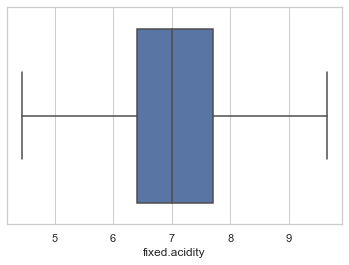

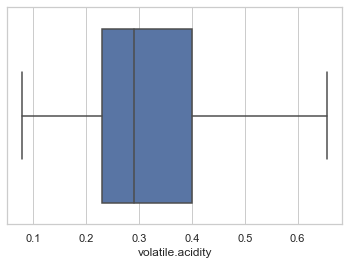

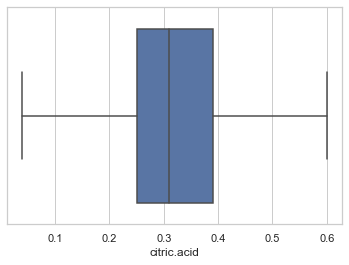

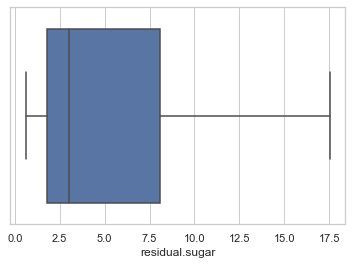

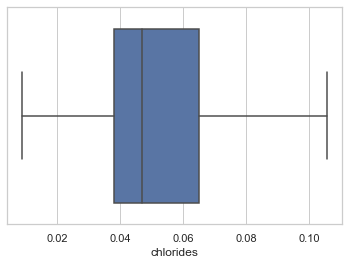

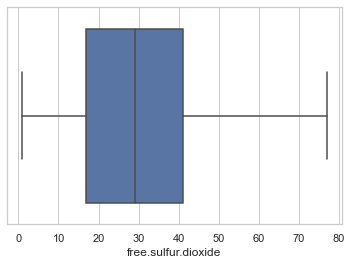

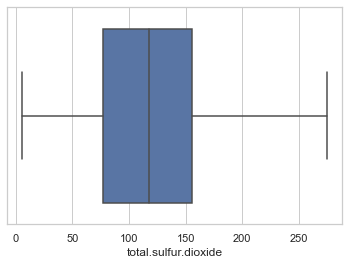

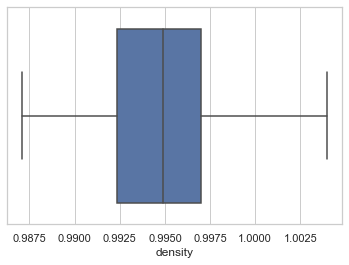

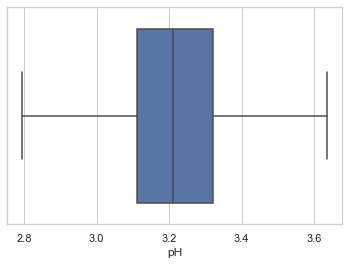

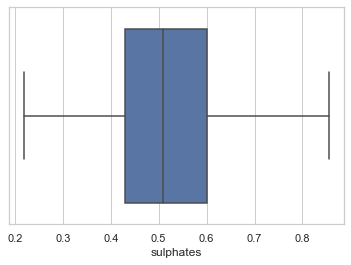

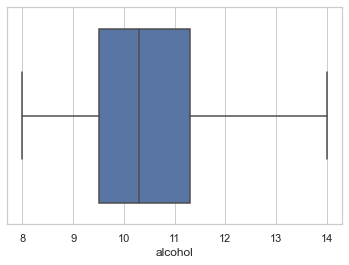

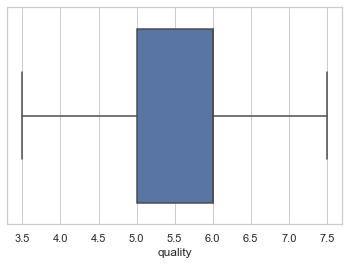

In [35]:
for i in X: #df.iloc[:,:-1]:
    # outlier in Bmi feature i used IRQ method 
    min_thresold, max_thresold = X[i].quantile([0.25, 0.75])
    percentile25 = X[i].quantile(0.25)
    percentile75 = X[i].quantile(0.75)
    iqr=percentile75-percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    #i am replacing the  outliers
    X[i] = np.where(X[i] > upper_limit,upper_limit,X[i])
    X[i] = np.where(X[i] < lower_limit,lower_limit,X[i])
    #remove outliers
    #df = df[(df[i]<upper_limit) & (df[i]>lower_limit)]
 
    sns.set_theme(style="whitegrid")
    sns.boxplot(X[i])
    plt.show()


In [36]:
corr= X.corr() #df.iloc[:,:-1]


In [37]:
#Checking for  Correlated matrix more thaan  thersold value 0.9 and less thaan -0.9
column = np.full((corr.shape[0]), True, dtype=bool)
print(column)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9 or corr.iloc[i,j] <= -0.9:
            if column[j]:
                print(column[j])
                column[j] = False
#print(column)
selected_columns =X.columns[column] # df.iloc[:,:-1].columns[column]
#selected_columns
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

[ True  True  True  True  True  True  True  True  True  True  True  True]


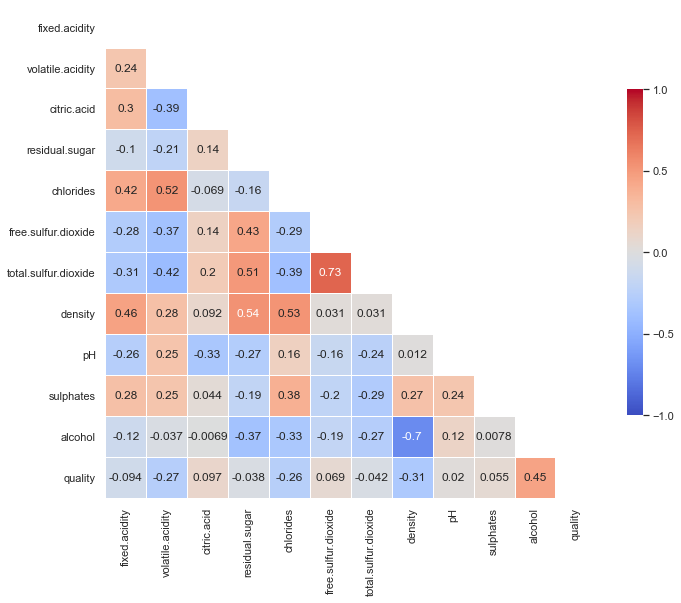

In [38]:
f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(corr, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [39]:
print('before data balancing',X.shape,Y.shape)
smk = SMOTETomek(random_state=42)
X, Y =smk.fit_resample(X,Y)
print('After data balancing',X.shape,Y.shape)

before data balancing (6497, 12) (6497, 1)
After data balancing (9748, 12) (9748, 1)


In [40]:
norm_model=MinMaxScaler()
X = norm_model.fit_transform(X)
# convert the array back to a dataframe
X = pd.DataFrame(X,columns=['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'])


In [41]:
#X_train_test, X_validation, y_train_test, y_validation = train_test_split(X_std, y, test_size=0.05, random_state=101)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=101)
print(X_test.shape)
print(y_test.shape)

(1950, 12)
(1950, 1)


### Pre-Pruning:
The pre-pruning technique refers to the early stopping of the growth of the decision tree. The pre-pruning technique involves tuning the hyperparameters of the decision tree model prior to the training pipeline. The hyperparameters of the decision tree including max_depth, min_samples_leaf, min_samples_split can be tuned to early stop the growth of the tree and prevent the model from overfitting.

In [15]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
max_features = list(range(1,X_train.shape[1]))
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
params = {
    'max_depth': max_depths,
    'min_samples_leaf': min_samples_leafs,
    'max_features': max_features,
    'min_samples_split':min_samples_splits,
    'criterion': ["gini", "entropy"]
}



In [16]:
model = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
search = GridSearchCV(model, params,cv=cv, scoring='accuracy')
result = search.fit(X_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)


Best Score: 0.9336150883776042
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 27.0, 'max_features': 8, 'min_samples_leaf': 0.1, 'min_samples_split': 0.2}


In [17]:
model = DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=27.0,
    min_samples_split=0.2,
    min_samples_leaf=0.1,
    max_features=9)                          
model.fit(X_train, y_train)
predictions = model.predict(X_test)

### # Post pruning decision trees with cost complexity pruning

Post-Pruning:
The Post-pruning technique allows the decision tree model to grow to its full depth, then removes the tree branches to prevent the model from overfitting. Cost complexity pruning (ccp) is one type of post-pruning technique


In [42]:
model = DecisionTreeClassifier()
Temp = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = Temp.ccp_alphas, Temp.impurities
ccp_alphas

array([0.00000000e+00, 3.20364463e-05, 1.26962010e-04, 1.27410668e-04,
       1.27501010e-04, 1.28068259e-04, 1.53748581e-04, 1.70984013e-04,
       1.70984013e-04, 1.91792262e-04, 2.05180816e-04, 2.21262305e-04,
       2.30828418e-04, 2.33160018e-04, 2.38156304e-04, 2.41389195e-04,
       2.50712513e-04, 2.51554395e-04, 2.52054019e-04, 3.30170739e-04,
       3.31526254e-04, 3.35262771e-04, 3.56730691e-04, 4.28986675e-04,
       4.84454703e-04, 5.69946710e-04, 5.95369006e-04, 1.03198648e-03,
       1.15485277e-03, 1.24101300e-03, 1.27924625e-03, 1.89708268e-03,
       2.03885031e-03, 2.52119970e-03, 2.53745609e-03, 4.69005688e-03,
       5.85157074e-03, 7.54067426e-03, 1.29582697e-02, 2.81937467e-02,
       4.05881662e-02, 3.62931576e-01])

In [43]:
models = []
for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    model.fit(X_train, y_train)
    models.append(model)

### Accuracy vs alpha for training and testing sets
----------------------------------------------------
When ``ccp_alpha`` is set to zero and keeping the other default parameters
of :class:`DecisionTreeClassifier`, the tree overfits, leading to
a 100% training accuracy and 88% testing accuracy. As alpha increases, more
of the tree is pruned, thus creating a decision tree that generalizes better.



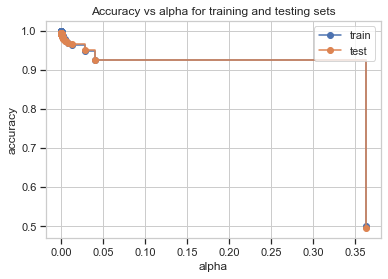

In [44]:
train_scores = [model.score(X_train, y_train) for model in models]
test_scores = [model.score(X_test, y_test) for model in models]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.show()

In [45]:
model = DecisionTreeClassifier(random_state=0, ccp_alpha=0.05)                          
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

array([1, 1, 0, ..., 1, 0, 1])

In [46]:
accuracy_score(y_test, predictions)

0.9256410256410257

In [47]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       986
           1       0.94      0.91      0.92       964

    accuracy                           0.93      1950
   macro avg       0.93      0.93      0.93      1950
weighted avg       0.93      0.93      0.93      1950



In [48]:
TP, FN, FP, TN = confusion_matrix(y_test,predictions,labels=[1,0]).reshape(-1)
print('Outcome values : \n','TP: ',TP,'\n','FN: ',FN,'\n','FP: ',FP,'\n','TN: ',TN,'\n')

Outcome values : 
 TP:  873 
 FN:  91 
 FP:  54 
 TN:  932 



In [49]:
pd.DataFrame(confusion_matrix(y_test, predictions), columns=['Actual red', 'Actual white'], index=['Predicted red', 'Predicted white'])

,Actual red,Actual white
Predicted red,932,54
Predicted white,91,873


In [50]:
print("Accuracy:",accuracy_score(y_test, predictions))
print("Recall:",recall_score(y_test, predictions))
print("Precision:",precision_score(y_test, predictions))
print('F1 Score:',f1_score(y_test,predictions))
print('roc Auc Score:',roc_auc_score(y_test,predictions))
#print('roc Auc Score)Probility:',roc_auc_score(y_test,model.predict_proba(X_test)[:,1]))

Accuracy: 0.9256410256410257
Recall: 0.9056016597510373
Precision: 0.941747572815534
F1 Score: 0.923320994182972
roc Auc Score: 0.9254174627355591


### Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

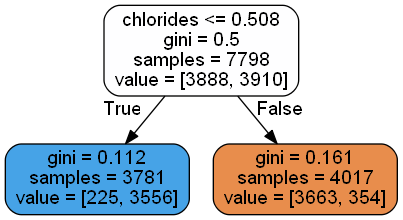

In [51]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(X.columns)
dot_data = StringIO()  
export_graphviz(model, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  
#plt.savefig('saved_figure.png')